# Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid", font_scale=1.5)
import plotly.express as px
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Load Iris Dataset

In [12]:
iris = pd.read_csv("E:\Infobyte\Task-1 Iris/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
iris.shape

(150, 6)

In [13]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [29]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [30]:
data=iris.groupby('Species')

In [32]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [14]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Visualization

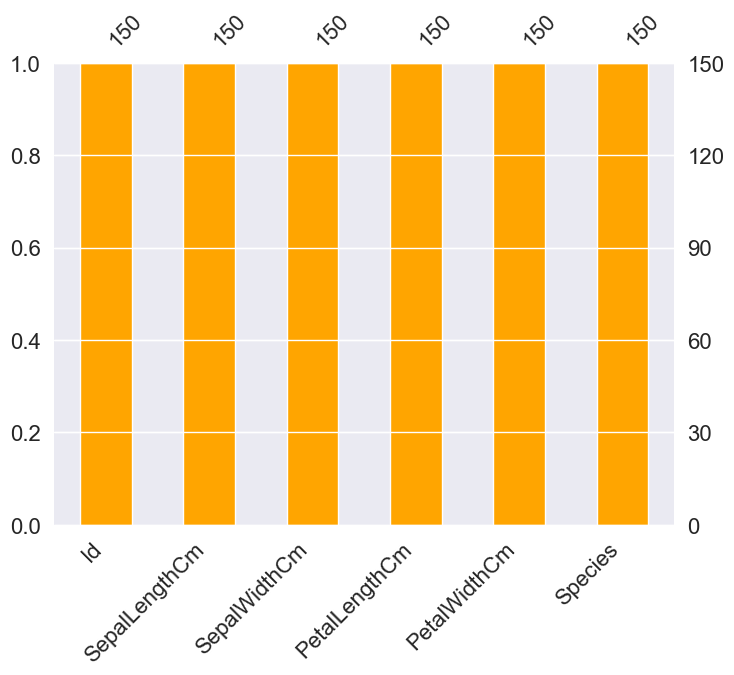

In [25]:
import missingno as msno
msno.bar(iris,figsize=(8,6),color='orange')
plt.show()

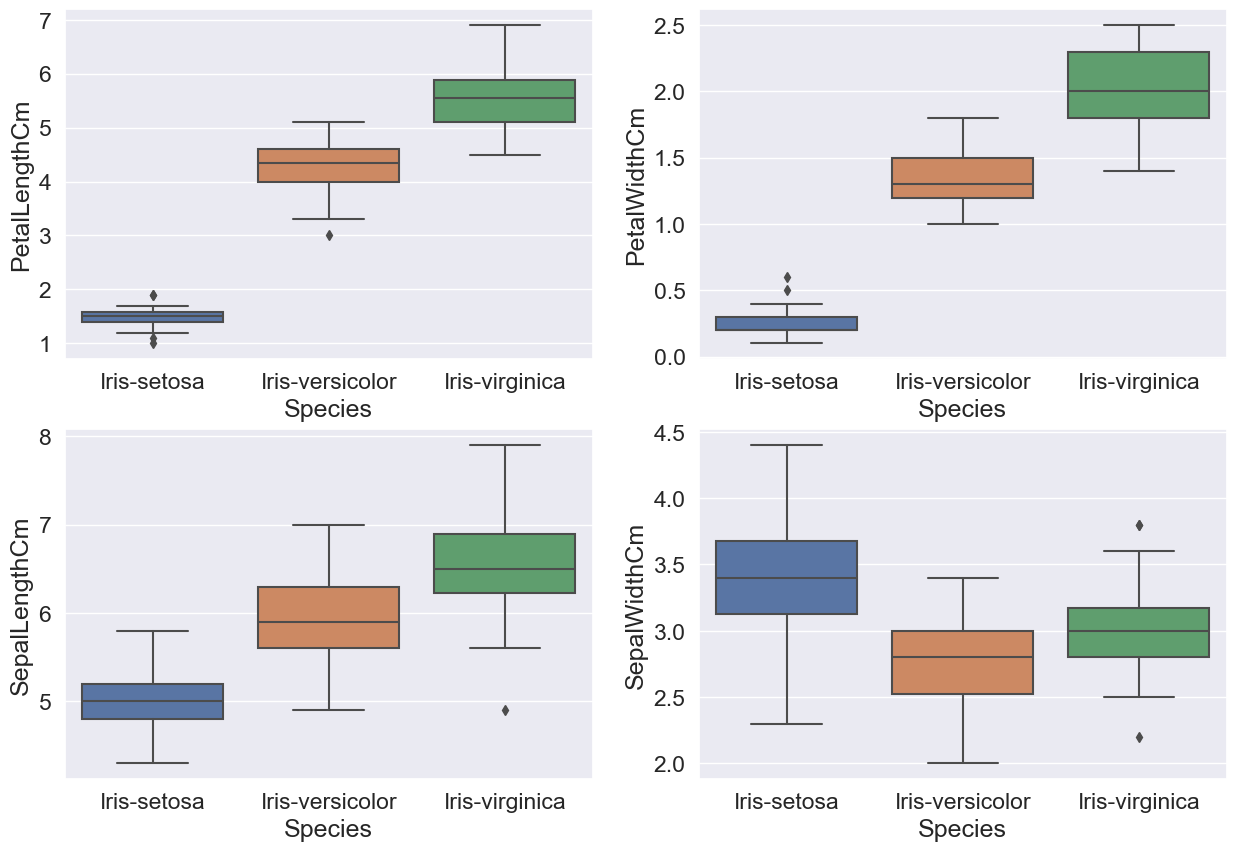

In [42]:
plt.figure(figsize=(15,10)) 
plt.subplot(2,2,1)
sns.boxplot (x='Species',y='PetalLengthCm',data=iris) 
plt.subplot(2,2,2)
sns.boxplot (x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot (x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot (x='Species',y='SepalWidthCm',data=iris)
plt.show()

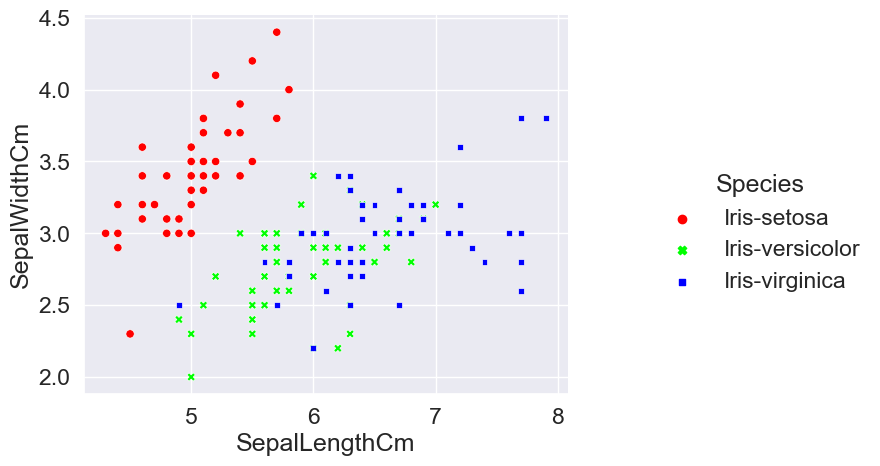

In [55]:
custom_palette = ['red', 'lime', 'blue']
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species',palette=custom_palette)
g.fig.set_size_inches(10,5)
plt.show()

In [28]:
import plotly.express as px
import plotly.io as pio
iris = px.data.iris()
fig = px.scatter(iris, x="sepal_width", y="sepal_length")
fig.show()

In [25]:
fig = px.scatter (iris, x="sepal_length", y="sepal_width", color="species", 
                  labels={
                      "sepal_length": "Sepal Length (cm)",
                      "sepal_width": "Sepal Width (cm)",
                      "species": "Species of Iris"
                  },
                  title="Manually Specified Labels")

fig.show(renderer='iframe')

In [21]:
fig = px.scatter (iris, x="sepal_length", y="sepal_width", marginal_x="histogram", marginal_y="rug")
fig.show(renderer='iframe')

In [22]:
fig = px.scatter(iris, x="sepal_length", y="sepal_width", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show(renderer='iframe')

Text(0.5, 0, 'size')

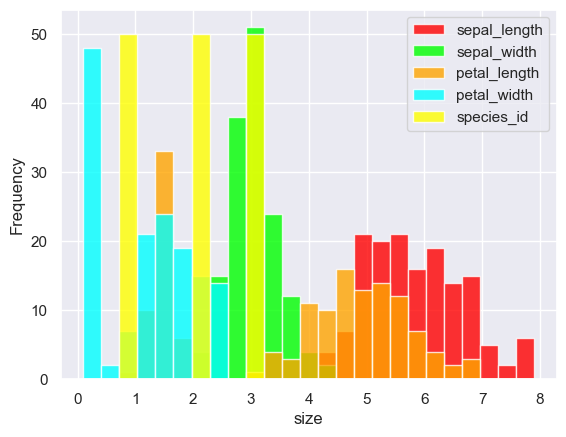

In [116]:
custom_color = ['red', 'lime', 'orange', 'cyan', 'yellow']
sns.set_context('notebook')
ax=iris.plot.hist(bins=25,alpha=0.8, color=custom_color)
ax.set_xlabel('size')

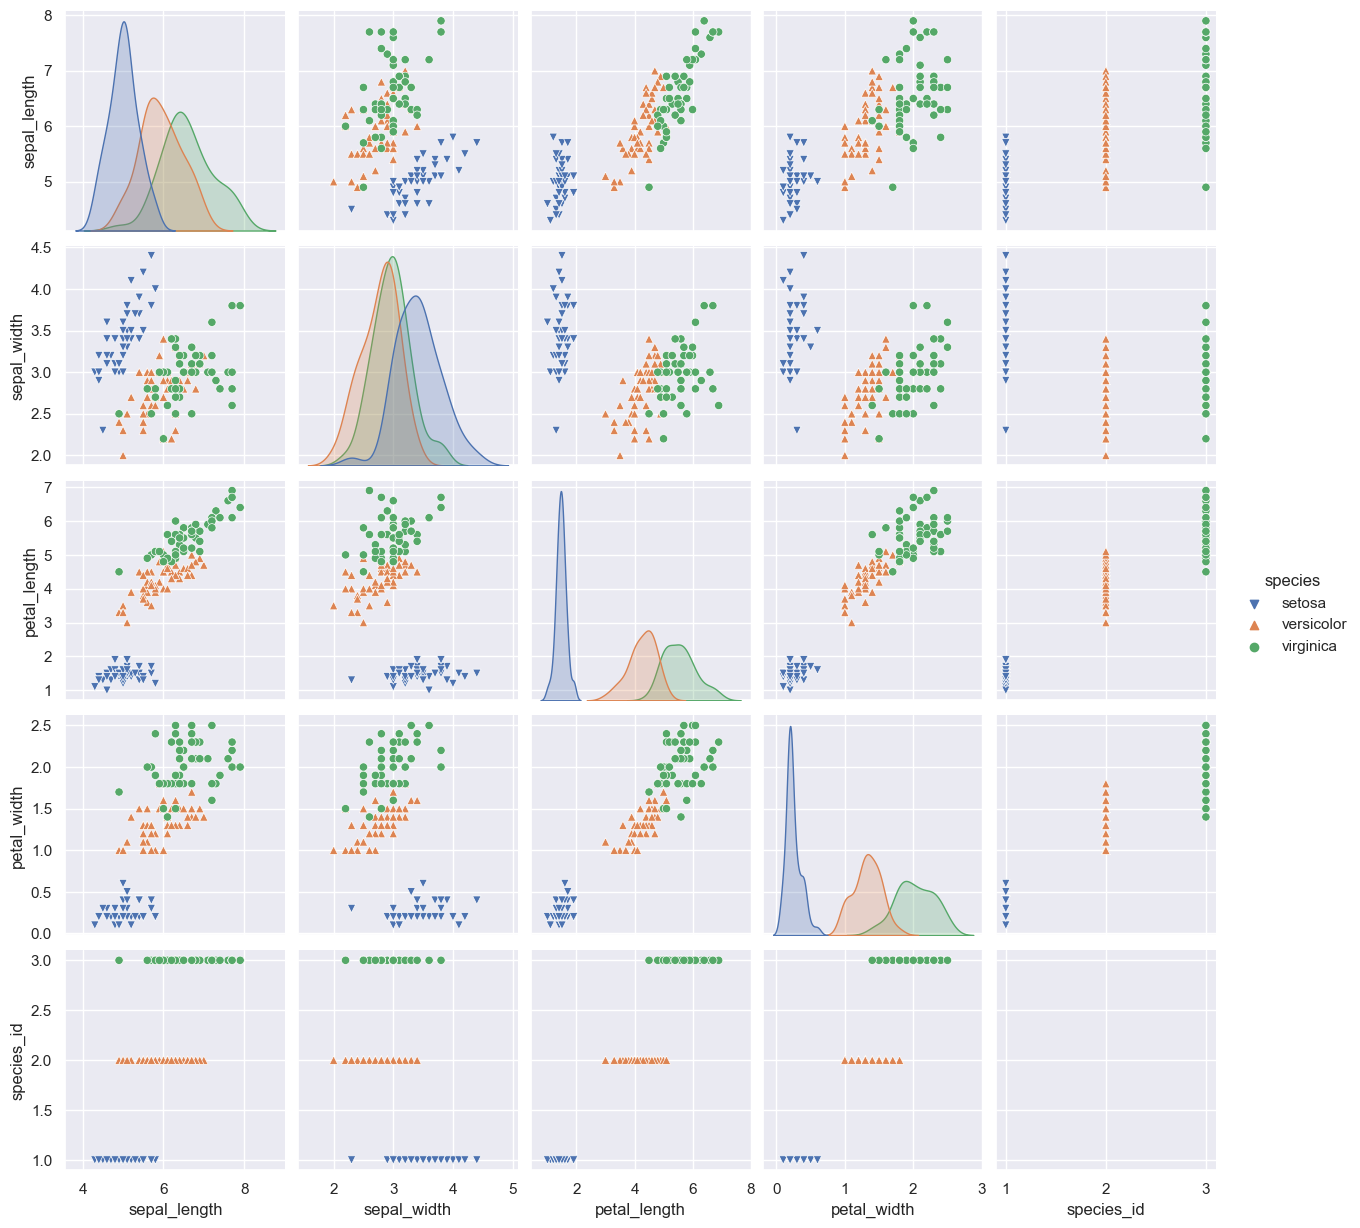

In [103]:
custom_markers = ['v', '^', 'o']
sns.pairplot(iris,hue="species", markers = custom_markers)
plt.show()

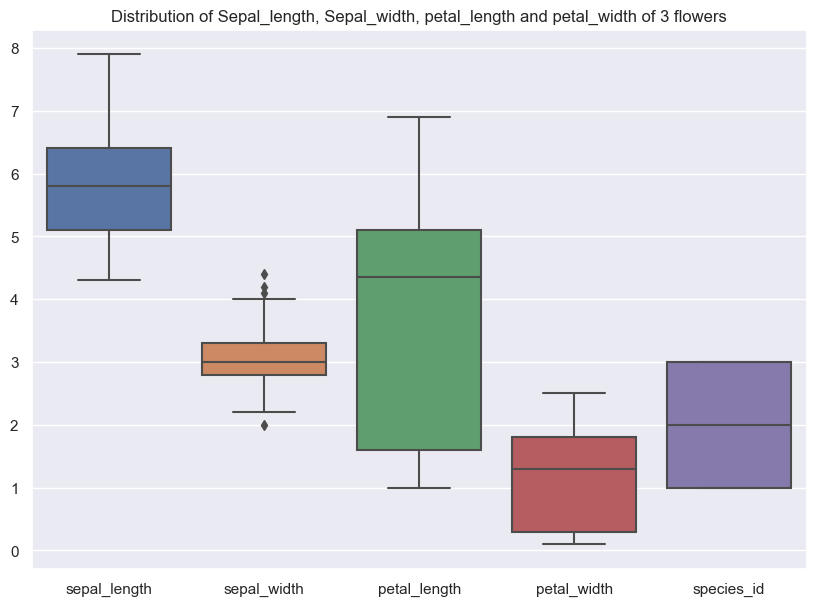

In [105]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

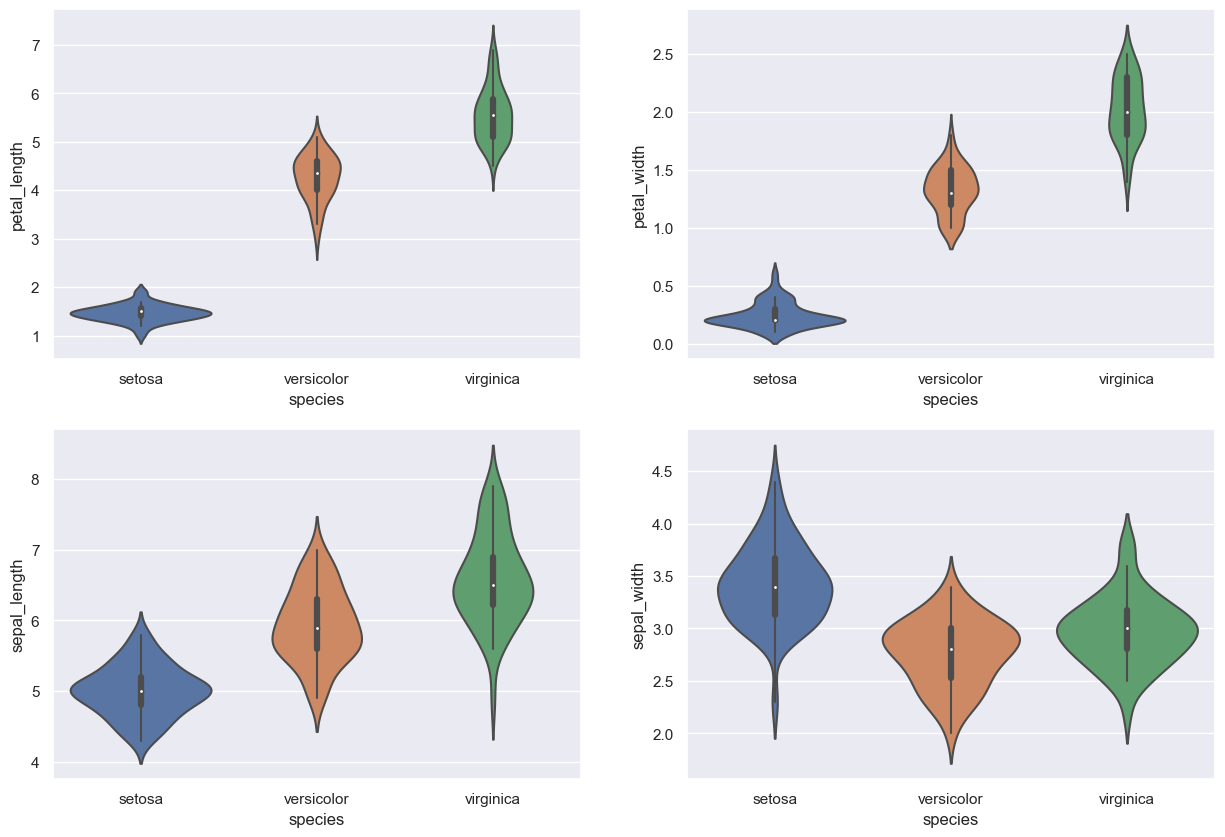

In [106]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot (x='species',y='sepal_width', data=iris)
plt.show()

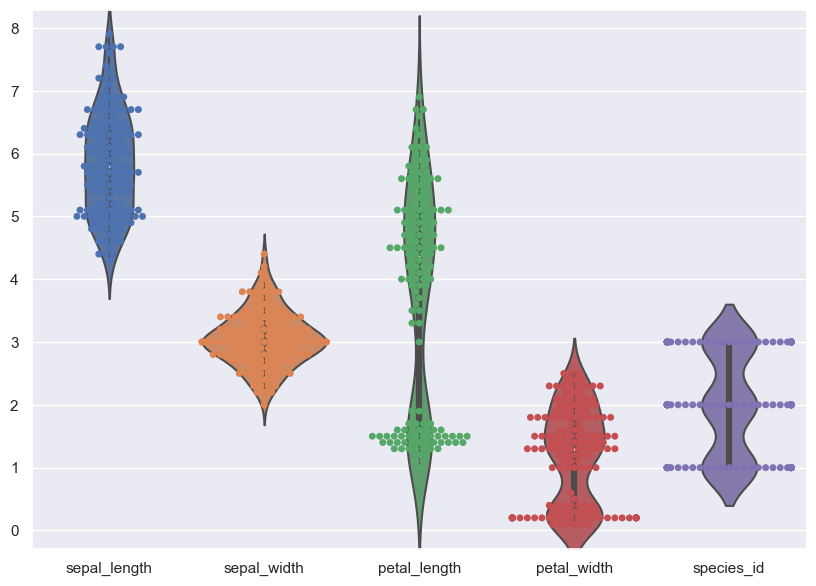

In [107]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot(data=iris)
plt.show()

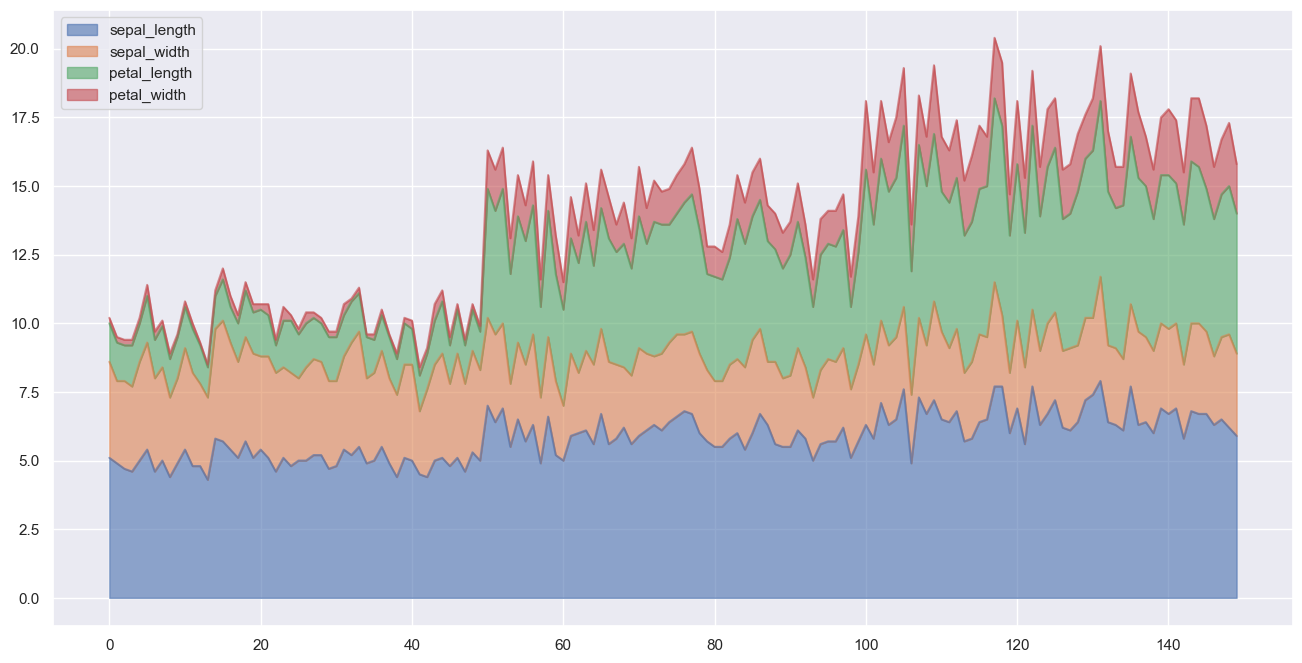

In [129]:
iris.plot.area(y=['sepal_length','sepal_width','petal_length','petal_width'], alpha = 0.6, figsize = (16,8));

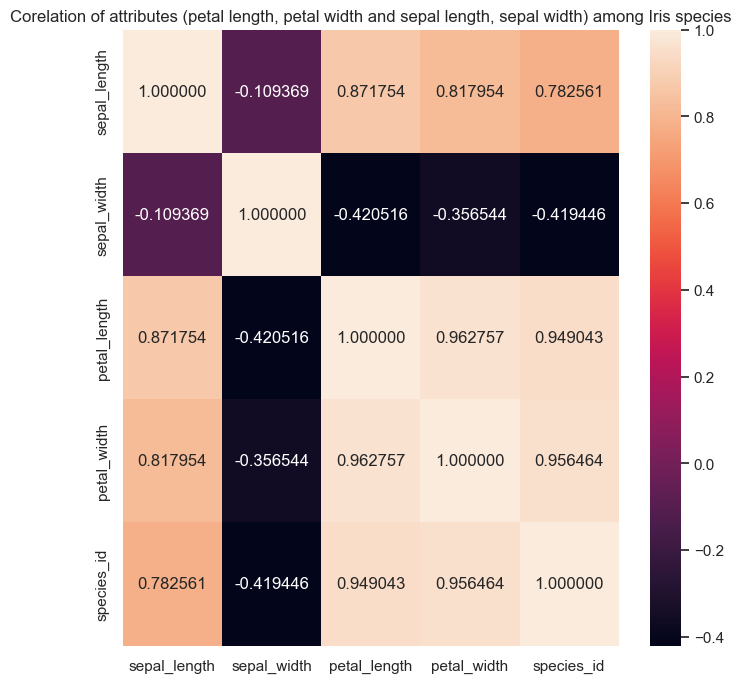

In [133]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True, fmt="f").set_title("Corelation of attributes (petal length, petal width and sepal length, sepal width) among Iris species")
plt.show()